In [ ]:
#Project Name: Customer Feedback Sentiment Analysis and Topic Modeling

In [ ]:
"""This project aims to analyze customer reviews using sentiment analysis (to classify reviews as positive, neutral, or negative) and
topic modeling (to identify common themes in the reviews)."""

'This project aims to analyze customer reviews using sentiment analysis (to classify reviews as positive, neutral, or negative) and\ntopic modeling (to identify common themes in the reviews).'

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/yelp.csv")

# Display basic info
print(df.info())
print(df.head())

# Dataset columns: 'review' (text), 'sentiment' (positive/negative)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlN

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    words = nltk.word_tokenize(text)
    # Remove stop words and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Check the cleaned text
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...   
4  General Manager Scott Petello is a good egg!!!...   

                                        cleaned_text  
0  wife took birthday breakfast excellent weather...  
1  idea people give bad review place go show plea...  
2  love gyro plate rice good also dig candy selec...  
3  rosie dakota love chaparral dog park convenien...  
4  general manager scott petello good egg go deta...  


In [ ]:
# Map stars to sentiment labels
def map_sentiment(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['stars'].apply(map_sentiment)

# Display sentiment distribution
print(df['sentiment'].value_counts())


sentiment
positive    6863
negative    1676
neutral     1461
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate model
y_pred = lr_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.55      0.64       308
     neutral       0.51      0.19      0.28       289
    positive       0.81      0.97      0.88      1403

    accuracy                           0.79      2000
   macro avg       0.70      0.57      0.60      2000
weighted avg       0.76      0.79      0.76      2000



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])


Topic 1:
['froyo', 'frosting', 'goodwill', 'selection', 'great', 'shoe', 'store', 'clothes', 'cupcake', 'donut']
Topic 2:
['service', 'go', 'one', 'get', 'like', 'time', 'great', 'good', 'food', 'place']
Topic 3:
['love', 'carne', 'service', 'good', 'great', 'salsa', 'burrito', 'taco', 'food', 'mexican']
Topic 4:
['instructor', 'cornish', 'hooter', 'class', 'applebees', 'brow', 'studio', 'yoga', 'closed', 'pasty']
Topic 5:
['cheese', 'sandwich', 'burger', 'sauce', 'place', 'salad', 'great', 'food', 'chicken', 'good']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])


Topic 1:
['froyo', 'frosting', 'goodwill', 'selection', 'great', 'shoe', 'store', 'clothes', 'cupcake', 'donut']
Topic 2:
['service', 'go', 'one', 'get', 'like', 'time', 'great', 'good', 'food', 'place']
Topic 3:
['love', 'carne', 'service', 'good', 'great', 'salsa', 'burrito', 'taco', 'food', 'mexican']
Topic 4:
['instructor', 'cornish', 'hooter', 'class', 'applebees', 'brow', 'studio', 'yoga', 'closed', 'pasty']
Topic 5:
['cheese', 'sandwich', 'burger', 'sauce', 'place', 'salad', 'great', 'food', 'chicken', 'good']


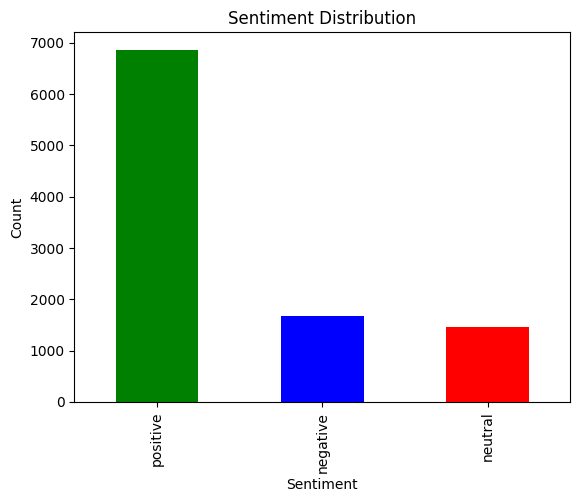

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


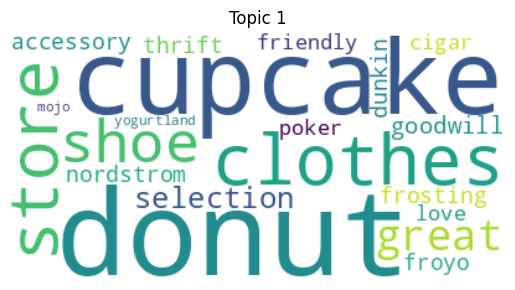

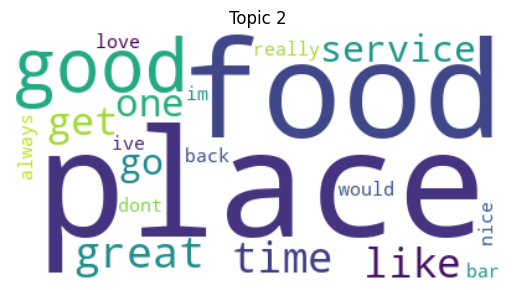

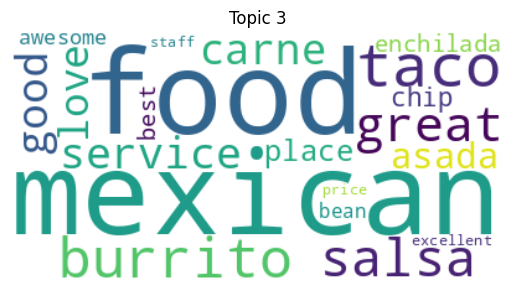

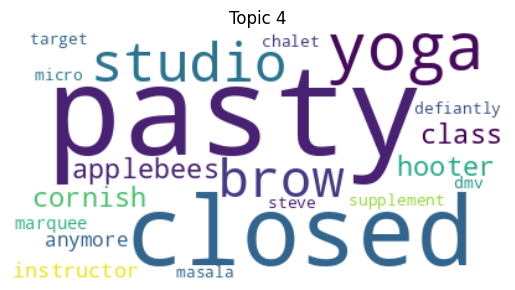

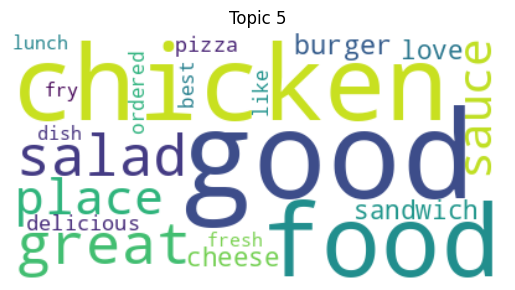

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each topic
for idx, topic in enumerate(lda_model.components_):
    words = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx+1}")
    plt.show()

In [ ]:
# Example reviews
new_reviews = [
    "The food was amazing and the service was excellent!",
    "Worst experience ever. Will never visit again.",
    "Not good not bad",
    "Average",
    "Overall damn",
    "The movie was fantastic! The acting was great, and the story was engaging.",
    "The story was boring, and the acting was mediocre.",
    "An amazing movie with a fantastic story and outstanding acting!"
]

# Preprocess new reviews
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

# Predict sentiment
predictions = lr_model.predict(new_reviews_tfidf)
print("Predicted Sentiments:", predictions)


Predicted Sentiments: ['positive' 'negative' 'neutral' 'neutral' 'positive' 'positive'
 'negative' 'positive']
